In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit

In [2]:
def prepare_plot(name_x, name_y):
    fig, ax = plt.subplots(figsize = (10, 8))
    ax.minorticks_on()
    ax.grid(which = 'major')
    ax.grid(which = 'minor', linestyle = ':')
    ax.set_ylabel(name_y)
    ax.set_xlabel(name_x)
    return ax

def max_sigma(y, ya):
    if (len(y) != len(ya)):
        print("ERROR! func max_sigma, len(y) != len(ya)\n")
        return
    max_sigma = 0.0
    i = 0
    for elem in y:
        if (abs(elem - ya[i]) > max_sigma):
            max_sigma = abs(elem - ya[i])
    return max_sigma

def max_delta_x(x):
    return max(x) - min(x)

def drow_line(ax_cur, x, y, x_err=0, y_err=0, line_color="red"):
    ax_cur.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', color=line_color)
    p = np.polyfit(x, y, 1)
    ya = np.polyval(p, x)
    df_local = pd.DataFrame()
    df_local['x'] = x
    df_local['ya'] = ya
    df_local.sort_values(by=['x'])
    ax_cur.plot(df_local['x'], df_local['ya'], linestyle='dashed', color=line_color)
    k = (ya[1] - ya[0]) / (x[1] - x[0])
    delta_k = 12 ** 0.5 * max_sigma(y, ya) / max_delta_x(x) / len(x) ** 2
    print("k =", k, '(' + line_color + ')')
    print("delta k =", delta_k) 

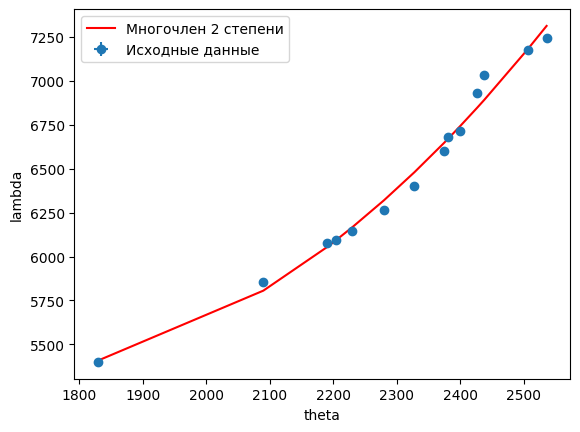

In [3]:
lambda_ = [7245.17, 7173.94, 7032.41, 6929.47, 6717.04, 6678.28, 6598.95, 6402.25, 6266.49, 6143.06, 6096.16, 6074.34, 5852.49, 5400.56]
angle_ = [2536, 2506, 2438, 2427, 2400, 2380, 2374, 2328, 2280, 2230, 2204, 2190, 2090, 1830]


# Приближение многочленом 2 степени
z = np.polyfit(angle_, lambda_, 2)
p = np.poly1d(z)

err_x = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

# Создаем график
plt.errorbar(angle_, lambda_, xerr=err_x, yerr=0, fmt='o', label='Исходные данные')
plt.plot(angle_, p(angle_), 'r-', label='Многочлен 2 степени')

# Добавляем подписи осей и легенду
plt.xlabel('theta')
plt.ylabel('lambda')
plt.legend()

# Отображаем график
plt.show()



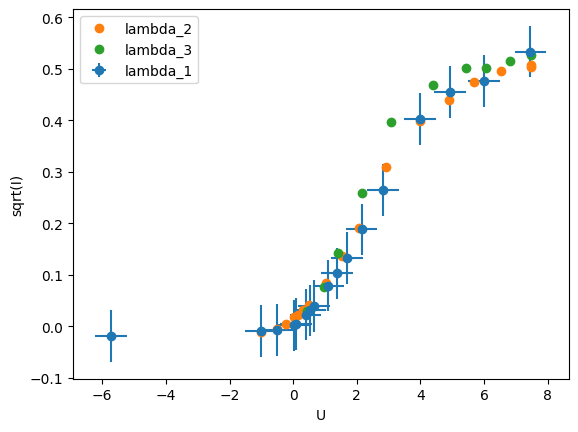

In [4]:
sqrtI_1 = [0.533, 0.476, 0.455, 0.402, 0.265, 0.186+0.002, 0.131+0.002, 0.101+0.002, 0.077+0.002, 0.038+0.002, 0.029+0.002, 0.021+0.002, 0.003+0.002, 0+0.002, -0.009+0.002, -0.011+0.002, -0.021+0.002]
U_1 = [7.46, 5.997, 4.932, 3.998, 2.813, 2.151, 1.706, 1.39, 1.109, 0.661, 0.531, 0.391, 0.090, 0.024, -0.504, -1.011, -5.714]

x_err = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
y_err = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

# Создаем график
plt.errorbar(U_1, sqrtI_1, xerr=x_err, yerr=y_err, fmt='o', label='lambda_1')

sqrtI_2 = [0.503, 0.496, 0.440, 0.475, 0.507, 0.399, 0.296+0.013, 0.177+0.013, 0.123+0.013, 0.072+0.013, 0.029+0.013, 0.019+0.013, 0.010+0.013, 0.005+0.013, -0.008+0.013, -0.018+0.013, -0.024+0.013]
U_2 = [7.467, 6.537, 4.907, 5.678, 7.472, 3.984, 2.924, 2.064, 1.547, 1.030, 0.510, 0.309, 0.145, 0.024, -0.209, -0.503, -1.009]

plt.plot(U_2, sqrtI_2, 'o', label='lambda_2')
sqrtI_3 = [0.526, 0.515, 0.502, 0.501, 0.468, 0.397, 0.259, 0.143, 0.076, 0.029]
U_3 = [7.475, 6.825, 6.063, 5.430, 4.384, 3.077, 2.154, 1.406, 0.96, 0.424]

plt.plot(U_3, sqrtI_3, 'o', label='lambda_3')

# Добавляем подписи осей и легенду
plt.xlabel('U')
plt.ylabel('sqrt(I)')
plt.legend()

# Отображаем график
plt.show()


Коэффициенты прямой k =  0.0981355331067153
b =  -0.018057584448378003


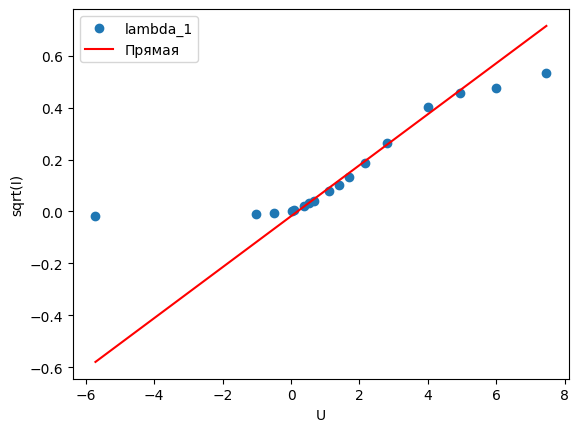

0.18400658636807612


In [5]:
# Приближение прямой
z = np.polyfit(U_1[2:14], sqrtI_1[2:14], 1)
p = np.poly1d(z)

plt.plot(U_1, sqrtI_1, 'o', label='lambda_1')
plt.plot(U_1, p(U_1), 'r-', label='Прямая')

print("Коэффициенты прямой k = ", z[0])
print("b = ", z[1])

# Добавляем подписи осей и легенду
plt.xlabel('U')
plt.ylabel('sqrt(I)')
plt.legend()

# Отображаем график
plt.show()

# y = kx + b
# 0 = kx + b
# kx = -b
# x = -b/k
x = 0.018057584448378003/0.0981355331067153
print(x)

Коэффициенты прямой k =  0.09962850291885815
b =  -0.0016713934548583508
0.016776257856846524


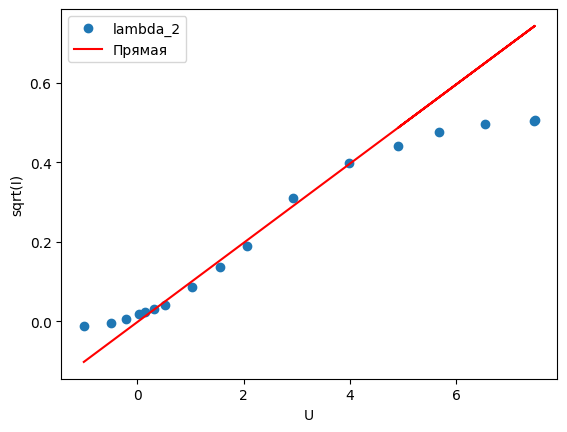

In [6]:
# Приближение прямой
z = np.polyfit(U_2[5:14], sqrtI_2[5:14], 1)
p = np.poly1d(z)

plt.plot(U_2, sqrtI_2, 'o', label='lambda_2')
plt.plot(U_2, p(U_2), 'r-', label='Прямая')

print("Коэффициенты прямой k = ", z[0])
print("b = ", z[1])

x = -z[1]/z[0]
print(x)
# Добавляем подписи осей и легенду
plt.xlabel('U')
plt.ylabel('sqrt(I)')
plt.legend()

# Отображаем график
plt.show()

Коэффициенты прямой k =  0.14254078804996695
b =  -0.04786393218975693
0.33579112929401284


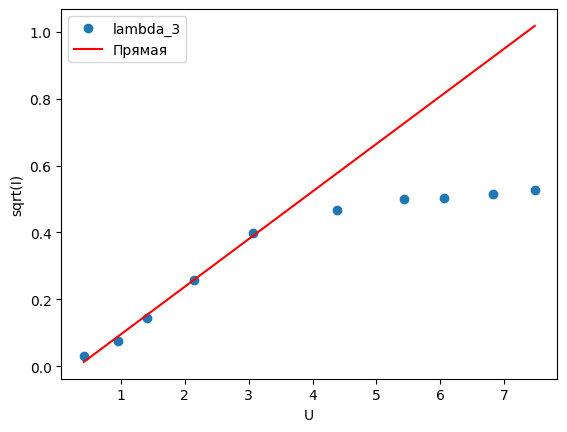

In [7]:
# Приближение прямой
z = np.polyfit(U_3[5:14], sqrtI_3[5:14], 1)
p = np.poly1d(z)

plt.plot(U_3, sqrtI_3, 'o', label='lambda_3')
plt.plot(U_3, p(U_3), 'r-', label='Прямая')

print("Коэффициенты прямой k = ", z[0])
print("b = ", z[1])

x = -z[1]/z[0]
print(x)
# Добавляем подписи осей и легенду
plt.xlabel('U')
plt.ylabel('sqrt(I)')
plt.legend()

# Отображаем график
plt.show()

Коэффициент наклона прямой 7.83405343716675e-16
b =  -0.2193886480603004
k = 7.834053437166749e-16 (blue)
delta k = 1.3962360375078877e-16


,w
0,4.178909e+14
1,5.551137e+14
2,5.122477e+14
3,0.000000e+00


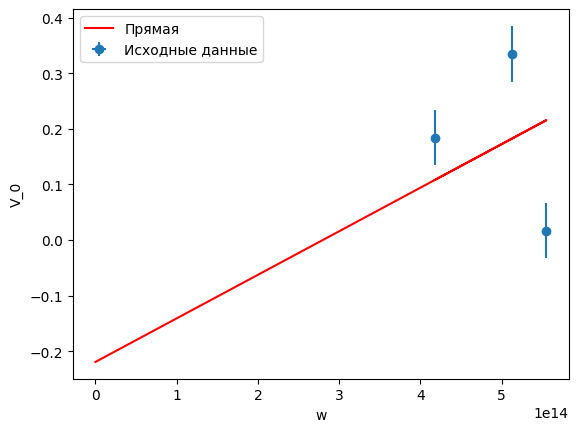

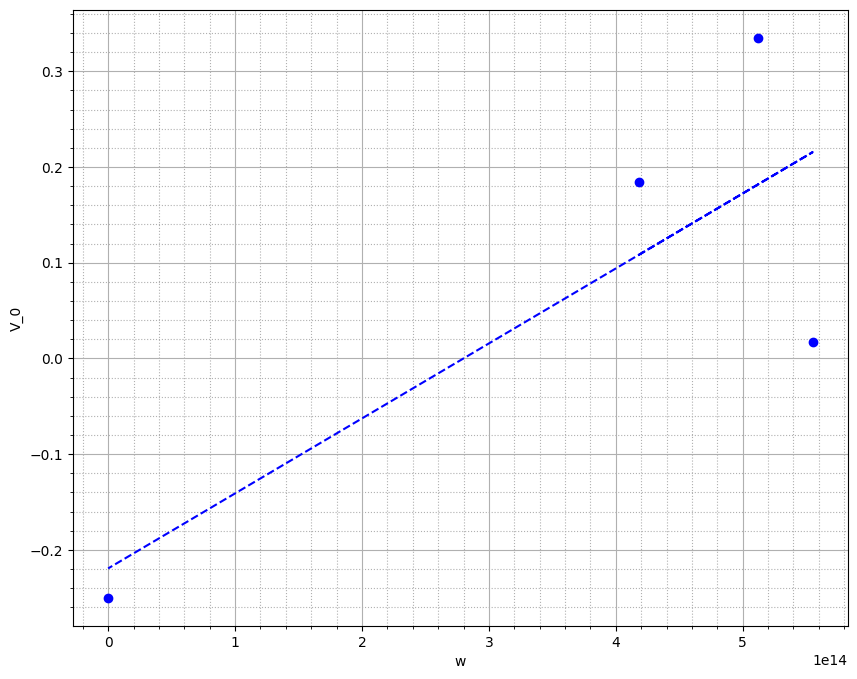

In [8]:
V_0 = [0.184, 0.017, 0.335, -0.25]
c = 299792458

w = [c/(7173.94/1e10), c/(5400.56/1e10), c/(5852.49/1e10), 0]

data_3 = pd.DataFrame()
data_3["w"] = w

# Приближение прямой
z = np.polyfit(w, V_0, 1)
print("Коэффициент наклона прямой", z[0])
print("b = ", z[1])

p = np.poly1d(z)

# Создаем график
plt.errorbar(w[0:3], V_0[0:3], xerr=0, yerr=0.050, fmt='o', label='Исходные данные')
plt.plot(w, p(w), 'r-', label='Прямая')

# Добавляем подписи осей и легенду
plt.xlabel('w')
plt.ylabel('V_0')
plt.legend()

ax1 = prepare_plot("w", "V_0")
drow_line(ax1, w, V_0, 0, 0, "blue")

data_3

In [9]:
# Emax = eV_0
# у = kx + b
# kx = -b
w_kr = - z[1]/z[0] 
print(w_kr/1e15)

delta_k = 1.3962360375078877e-16
k = 7.834053437166749e-16
delta_w_kr = 1*delta_k/k**2
print(delta_w_kr/1e15)

0.2800448705384937
0.22750229597126664


In [10]:
h_ = 1.602*1e-19 * z[0]
print(h_)


delta_h_ = 1.3962360375078877e-16* 1.602*1e-19
print(delta_h_)

print("A = ", h_*w_kr/(1.6*1e-19))

1.2550153606341132e-34
2.2367701320876362e-35
A =  0.2196628838703757
